In [3]:
from IPython.display import Image

In [4]:
import pandas as pd
import numpy as np

from numpy import log
from pandas import Series

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

--------------------------------------
#### what is time series analytics?
------------------------------------


- Time series is an `important` area of machine learning, involves a `time component`
    - Difficult subject
        - because of `time component` that makes time series problems more difficult to handle.
        
- data that is measured/captured at `equally-spaced` intervals. 
    - e.g. a sensor that takes `measurements every minute`.

- Time series analysis attempts to understand the past and predict the future (similar to SUPERVISED learning)

- Examples
    - Price of stock over successive days
    - Sizes of packets over network
    - Sizes of queries to a database system
    - Number of active VMs in a cloud
    - Real gross national product in the United States, 1872-1985 (annual).
    - Rate of growth of real gross national product in the United States, 1873-1985 (annual).
    - Unemployment rate in the United States, 1873-1985 (annual).
    - Price level in the United States, 1870-1985 (annual).
    - Inflation rate in the United States, 1870-1985 (annual).


#### real life Examples:

`TIME SERIES DATA`

- Let us denote by $\large \left\{y_{t}\right\}$ a time series where $\large t$ denotes the time at which the observation was taken. 

- Usually, $t \in \mathbb{Z}$, where $\mathbb{Z}=\{\ldots,-2,-1,0,1,2, \ldots\}$ is the set of positive and negative integer values. 

- In practice, however, only a `finite stretch` of data is available. 

- In such situations, we can write the time series as $\large \left\{y_{1}, y_{2}, \ldots, y_{n}\right\}$. 

- A time series $\left\{y_{t}\right\}$ corresponds to a `stochastic process` which in turn is composed of random variables observed across time. 

**Financial Data**

Finance is a field where time series arises naturally from the evolution of indexes and prices.

`Standard & Poor's Stock Index`. 

- Figure shows the logarithm of the S&P500 daily stock index for the period from January 1950 to January 2014. 

- Note that this index seems to increase with time, but there are some downward periods commonly denoted as `bear markets`. 

- In order to study these indices, it is customary in finance to consider the `logarithm return`, which is defined as

$$\large r_{t}=\log \frac{P_{t}}{P_{t-1}}=\log P_{t}-\log P_{t-1}$$

where $P_t$ denotes the price or the index value at time $t$.

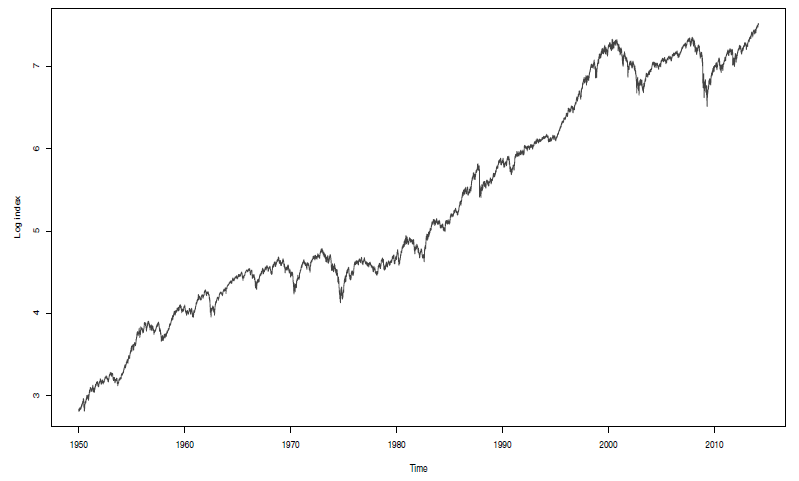

In [5]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TS-00.PNG', width=600)

##### --> S&P500 daily stock log index, January 1950 to January 2014.

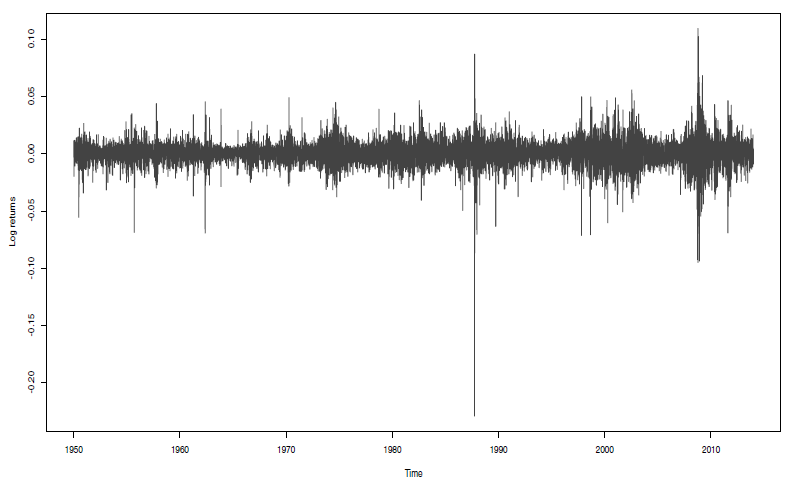

In [6]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TS-01.PNG', width=600)

Observe the `great drop` in returns experienced on `October 1987` and the `abrupt changes or great volatility` during `2009`.

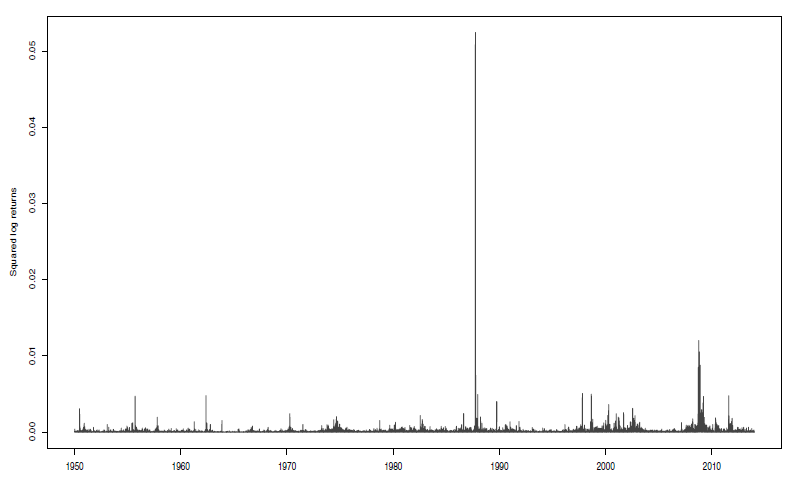

In [7]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TS-02.PNG', width=600)

Another look at the volatility is shown above where the `squared returns`, $r_t^2$ , are plotted. 

From this graph, the high volatility of this stock index is evident during these periods.

`Volume of Transactions`

- As another example of financial data, the daily volume of transactions of the S&P500 stocks is displayed below. 

- Observe that this series exhibits an `upward trend` up to 2009.

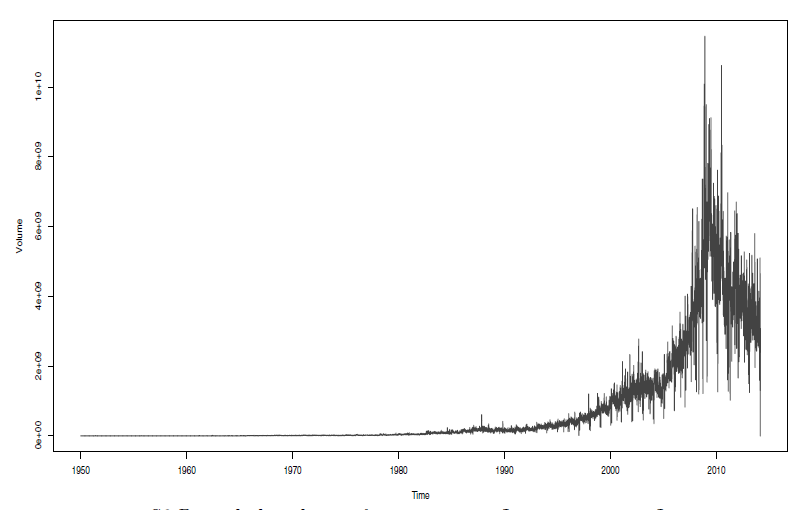

In [8]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TS-03.PNG', width=600)

- On the other hand, depicts a `logarithm transformation` of the above time series. Note that the variance of the data across time is now more stabilized, emerging a seemingly overall `upward trend`, excepting the values after 2009 and some other periods.

- These transaction volume data can be considered as an example of a non-Gaussian time series.

`Economic Data`

- Plot below exhibits the `monthly US employment` in the arts, entertainment and recreation section for the January 1990 to December 2012, measured in thousands of persons. 

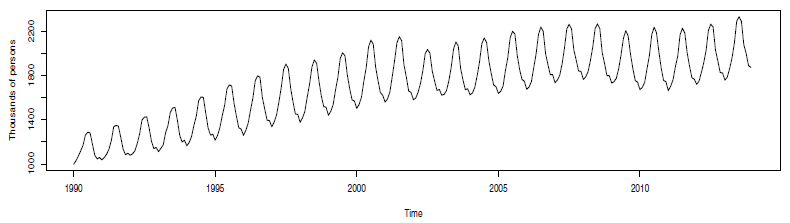

In [9]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TS-05.PNG', width=600)

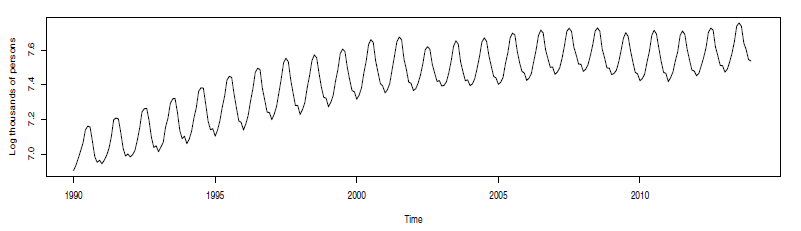

In [10]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TS-06.PNG', width=600)

- On the other hand, above pic shows the `logarithm transformation` of these data. 

- Notice that this data transformation seems to `stabilize the variance` of the series across time. 

- On both panels, however, a `seasonal` pattern and an `upper trend` are evident.

#### Time series in Python (libraries)

1. scipy
2. Pandas - for data handling 
3. `Statsmodels` - time series modeling
4. scikit-learn - for machine learning
5. Numpy - for array operation
6. matplotlib - for plotting


|library     | Purpose|
|-------     | -------|
|PANDAS      | The Series object for representing a univariate time series.|
|            | Explicit handling of date-time indexes in data and date-time ranges. |
|            | Transforms such as `shifting`, `lagging`, and flling. |
|            | Resampling methods such as `up-sampling`, `down-sampling`, and aggregation|
| Statsmodel | Statsmodels library provides tools for `statistical` modeling|
|            | based on scipy |
|            | Statistical tests for stationarity such as the Augmented Dickey-Fuller unit root test.|
|            | Time series analysis plots such as autocorrelation function (ACF) and partial autocorrelation function (PACF).|
|            | Linear time series models such as autoregression (AR), moving average (MA), autoregressive moving average (ARMA), and autoregressive integrated moving average (ARIMA).    |          

#### Supervised Machine Learning

$$
Y=f(X)
$$

The goal is to `approximate the real underlying mapping` so well that when you have new
input data (X), you can predict the output variables (y) for that data.

|X  |  y |
|---|--- |
|5  | 0.9|
|4  | 0.8|
|5  | 1.0|
|3  | 0.7|
|4  | 0.9|

- `Time series` data can be phrased as `supervised` learning. 

- Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem. 

    - We can do this by using `previous time steps` as input variables and use the `next time step` as the output variable.
    
|time | measure |
|-----| ------- |
|1,   |100|
|2,   |110|
|3,   |108|
|4,   |115|
|5,   |120|

Re-organizing the time series dataset this way, the data would look as follows:

|X,   |y |
|-----|----|
|?,   |100|
|100, |110|
|110, |108|
|108, |115|
|115, |120|
|120, |?|

- the previous time step is the input (X) and the next time step is the output (y) 
- the order between the observations is preserved
- we have `no previous value` that we can use to predict the `first value` in the sequence. 
    - We will delete this row as we cannot use it.
- We can also see that we `do not have a known next value to predict` for the `last value` in the sequence. 
    - We will delete this value while training our supervised model also.
    
> The use of `prior time steps` to predict the next time step is called the `sliding window` method.

> In statistics and time series analysis, this is called a `lag` or `lag method`. 

> The number of previous time steps is called the `window width` or `size of the lag`. 

> This sliding window is the basis for how we can turn any time series dataset into a supervised learning problem. 

#### Sliding Window With Multivariates

- The number of observations recorded for a given time in a time series dataset matters. 

    - __Univariate__ Time Series: These are datasets where only a single variable is observed at each time, such as temperature each hour. 
     
    - __Multivariate__ Time Series: These are datasets where two or more variables are observed at each time.

> Most time series analysis methods, and even books on the topic, `focus on univariate data`.

- Multivariate data is often more difficult to work with. 
    - It is harder to model and often many of the classical methods `do not perform well`.

#### Conceptual topics

- Trends
- Seasonality
- Cyclical movements
- Unexpected variations

**Stationarity** - the above lead to non-stationarity of time series data


-----------------------------------
#### (1) Trend
-----------------------------
- `Trend`, is the `overall direction` of the data. 

- Trends indicate a slow change in the behavior of a variable in time, in its average over a long period.

- Although consecutive measurements may increase or decrease on an opposed direction, the overall behavior persists over time. 

    - An example of this is climate; in the Northern Hemisphere, temperatures might decrease by several degrees in May from one day to the next day, but the overall behavior is warming towards the summer.

#### example 1

__Flotation cell__
Description:	Data from a zinc-lead flotation cell measured on 5 variables; recorded from the PLCs.

Data source:	Actual data from a mining company.

Data shape:	2922 rows and 5 columns

In [57]:
location = r'D:\AI-DATASETS\01-MISC\flotation-cell.csv'

In [58]:
df_fcdata  = pd.read_csv(location, index_col=0)

In [59]:
df_fcdata.shape

(2922, 5)

In [60]:
df_fcdata.head()

,Feed rate,Upstream pH,CuSO4 added,Pulp level,Air flow rate
Date and time,,,,,
15/12/2004 19:57:01,341.049347,10.820513,7.995605,24.443470,2.802198
15/12/2004 19:57:31,274.270782,10.827351,7.786569,27.819294,2.798535
15/12/2004 19:58:01,334.836761,10.854701,7.655922,30.335533,2.805861
15/12/2004 19:58:32,323.605927,10.885470,7.838828,30.663738,2.802198
15/12/2004 19:59:03,322.341309,10.851282,7.995605,30.288647,2.805861


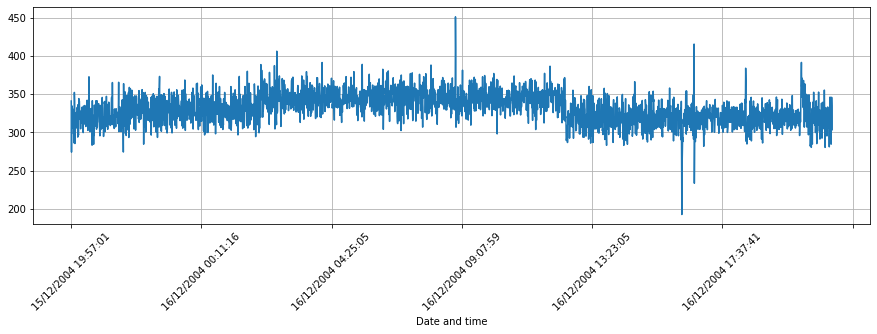

In [61]:
selected = df_fcdata['Feed rate']

selected.plot(rot=45)
plt.grid();

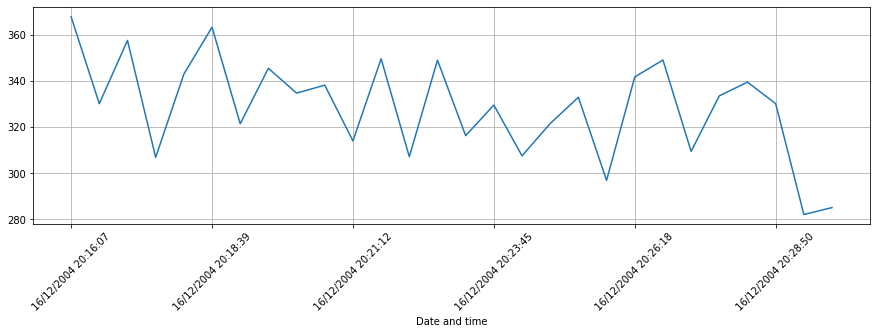

In [62]:
selected = df_fcdata.loc[(df_fcdata.index > '16/12/2004 20:16:00') & 
                         (df_fcdata.index < '16/12/2004 20:30:00'),
                         'Feed rate']

# selected = df_fcdata.loc[(df_fcdata.index > '16/12/2004 20:16:00') & 
#                          (df_fcdata.index < '19/12/2004 22:30:00'),
#                          'Feed rate']

selected.plot(rot=45)
plt.grid();


- we will be using a __polynomial fitting function, polyfit()__ to find the best adjusting first degree polynomial and its fitting error. 

- A first degree polynomial has 2 parameters, that we can call the _slope and the offset_. 

- If the slope is different from zero, then there is a trend in the data

- the residuals (that gives us a measure of the fitting error and that we will convert into the Normalized Mean Squared Error (NRMSE), that gives us a measurement of the error between 0 and 1)

In [17]:
type(selected), len(selected.index)

(pandas.core.series.Series, 28)

In [18]:
range(len(selected.index))

range(0, 28)

In [19]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),
                                              selected,
                                              1,
                                              full=True)

In [20]:
coefficients, residuals

(array([ -1.28569799, 346.12350374]), array([10086.50332397]))

In [21]:
mse = residuals[0]/(len(selected.index))

nrmse = np.sqrt(mse)/(selected.max() - selected.min())

print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope -1.285697991298598
NRMSE: 0.22131269459798317


- We can see that a negative trend is detected, of about -1.73 units of the Feed rate per time interval (in this dataset, the time interval is 30 seconds), 

- with an error of about 27.4%. 

We can now draw the trend line. Remember that the trend line is a polynomial in the Ax+B form:

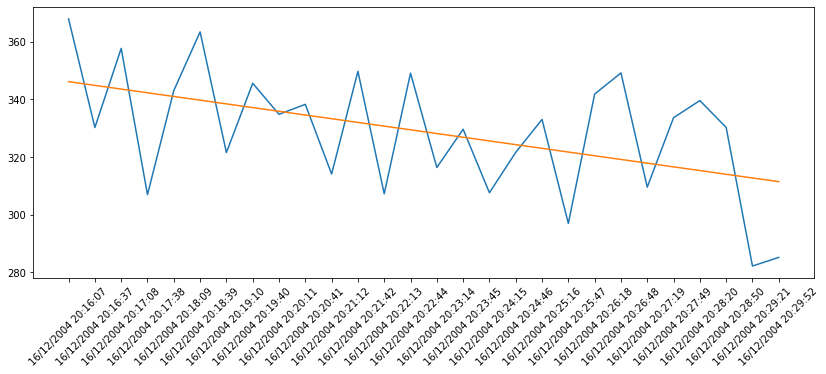

In [22]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)
plt.plot(selected)
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))]);

#### define a function to check trend and plot

In [23]:
def detect_trend (X_df, plot=False, series_type ='raw series', ax=None):
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse   = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    if plot:
        if ax:
            #ax.xaxis.set_xticks(rotation=90)
            ax.plot(X_df)
            ax.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))])

            if series_type == 'raw series':
                ax.set_title('data - {}, slope = {:.6f}'.format(series_type, float(coefficients[0])))
            else:
                ax.set_title('data - {} detrended, slope = {:.6f}'.format(series_type, float(coefficients[0])))
            ax.grid();
        else: 
            plt.xticks(rotation=90)
            plt.plot(X_df)
            plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))])

            if series_type == 'raw series':
                plt.title('data - {}, slope = {:.6f}'.format(series_type, float(coefficients[0])))
            else:
                plt.title('data - {} detrended, slope = {:.6f}'.format(series_type, float(coefficients[0])))
            plt.grid();

    return mse, coefficients[0]

... read another data set ...

In [65]:
location = r'D:\MYLEARN\datasets\sales-of-shampoo-over-a-three-year.csv'

In [67]:
df_sales_data  = pd.read_csv(location, index_col=0)
df_sales_data.shape

(36, 1)

In [68]:
df_sales_data.sample(5)

,Sales of shampoo over a three year period
Month,
2-06,287.0
3-08,407.6
1-05,180.3
3-12,646.9
3-04,439.3


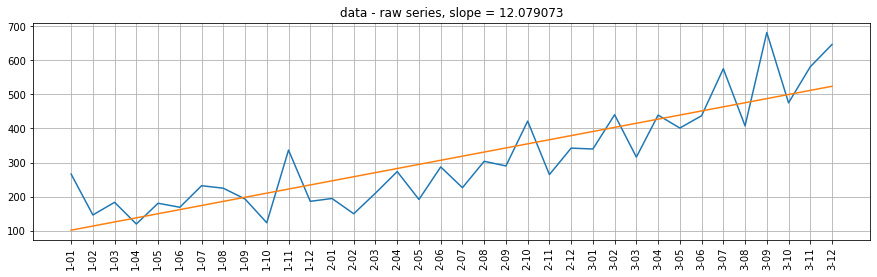

In [27]:
ret_value = detect_trend(df_sales_data, plot=True)

#### detrend the sales data

| Differencing| Decomposition |
| ------------| ------------- |
|This approach works well for data with a `linear trend`. If the trend is `quadratic` (the change in the trend also `increases or decreases`), then a `difference of the already-differenced` dataset can be taken, a second level of differencing. This process can be further `repeated` if needed. |The `residuals` from the fit of the model are a `detrended` form of the dataset. `Polynomial curve` fitting and other nonlinear models can also be used. We can implement this in Python by training a `scikit-learn LinearRegression` model on the data.|

In [28]:
# ------------------------------------------
# method - 1 : using scipy
# ------------------------------------------
from scipy.signal import detrend

detrend_scipy = detrend(df_sales_data)

# ------------------------------------------
# method - 2 : using differencing method
# ------------------------------------------
X    = df_sales_data.values

detrend_diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    detrend_diff.append(value)
    
# ------------------------------------------
# method - 3 : detrend by model fitting (decomposition)
# ------------------------------------------
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = [i for i in range(0, len(df_sales_data))]
X = np.reshape(X, (len(X), 1))

y = df_sales_data['Sales of shampoo over a three year period'].values

# fit the data
model.fit(X, y)    

y_pred = model.predict(X)

# detrend
detrend_decomposition = [y[i] - y_pred[i] for i in range(0, len(df_sales_data))]

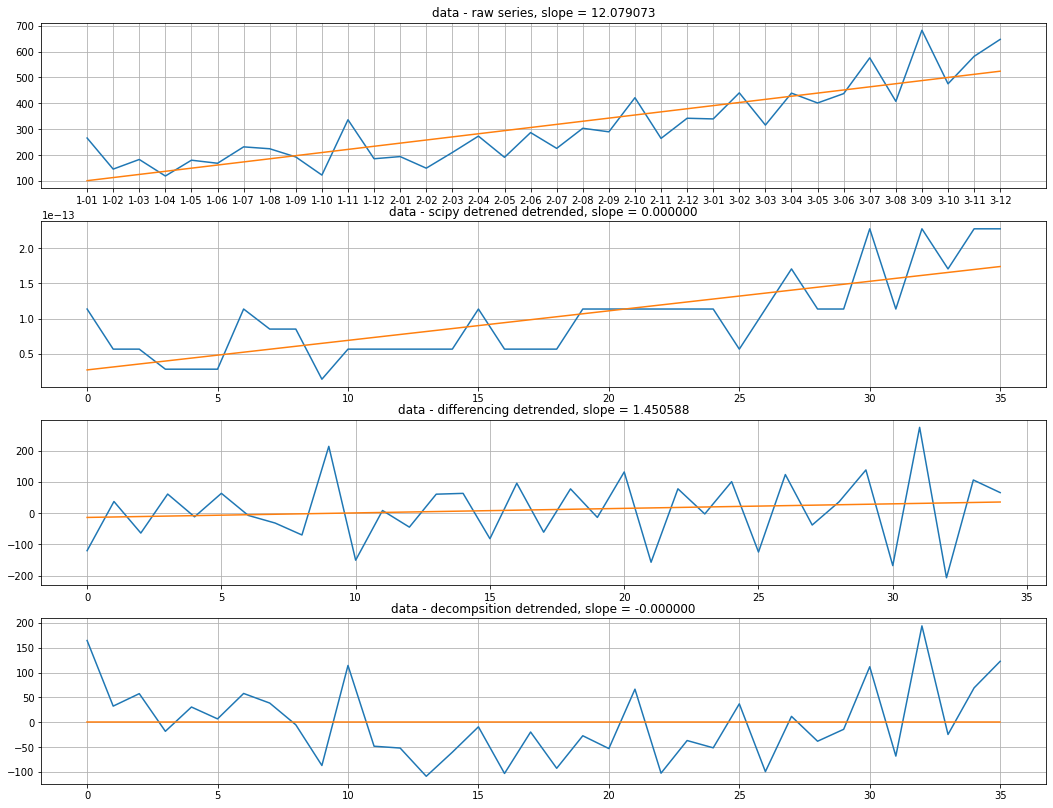

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(18, 14))

ret_value = detect_trend(df_sales_data,                       plot=True, series_type='raw series',    ax=ax1)
ret_value = detect_trend(detrend_scipy,                       plot=True, series_type='scipy detrened',ax=ax2)
ret_value = detect_trend(pd.DataFrame(detrend_diff),          plot=True, series_type='differencing',  ax=ax3)
ret_value = detect_trend(pd.DataFrame(detrend_decomposition), plot=True, series_type='decompsition',  ax=ax4)

----------------------------
#### (2) Seasonality
--------------------------------

types of seasonality; for example:

- Time of Day.
- Daily.
- Weekly.
- Monthly.
- Yearly.

The simplest approach to determining if there is an aspect of seasonality is to plot and review the data

#### using plots to check seasonality

In [69]:
location = r'D:\MYLEARN\datasets\multiTimeline.csv'

In [71]:
df = pd.read_csv(location)
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [72]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


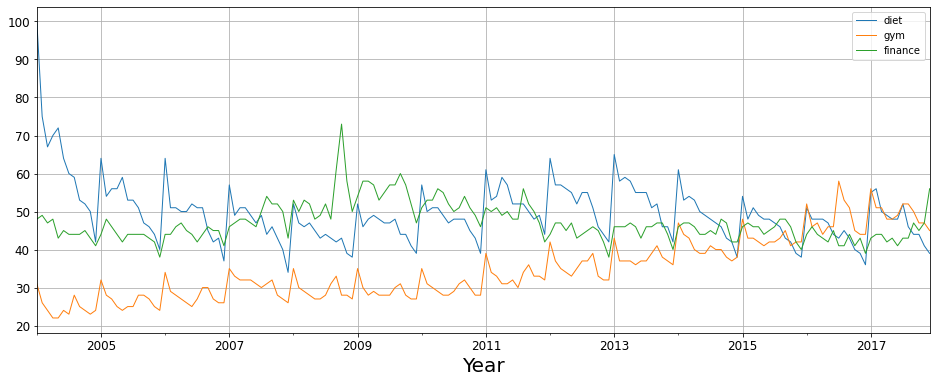

In [73]:
df.plot(figsize=(16, 6), linewidth=1, fontsize=12)

plt.xlabel('Year', fontsize=20)
plt.grid();

Note: 
- there is __seasonality__: each January, there's a big jump. 

- Also, there seems to be a __trend__: it seems to go slightly up, then down, back up and then back down. 

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence.

#### Stationarity

- If a process is stationary, that means it does not change its statistical properties over time, namely its mean and variance. 

- Data points are often __non-stationary__ or have means, variances and covariances that _change over time_. 

- `Non-stationary` behaviors can be trends, cycles, random walks or combinations of the three.

- `Non-stationary` data, as a rule, are _unpredictable and cannot be modeled or forecasted._ The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. 

- In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data.

- A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. 

> - constant mean
> - constant variance
> - an autocovariance that does not depend on time.

- Though stationarity assumption is taken in many TS models, almost __none of practical time series are stationary.__

- Most of the TS models work on the _assumption that the TS is stationary._ 

- Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 

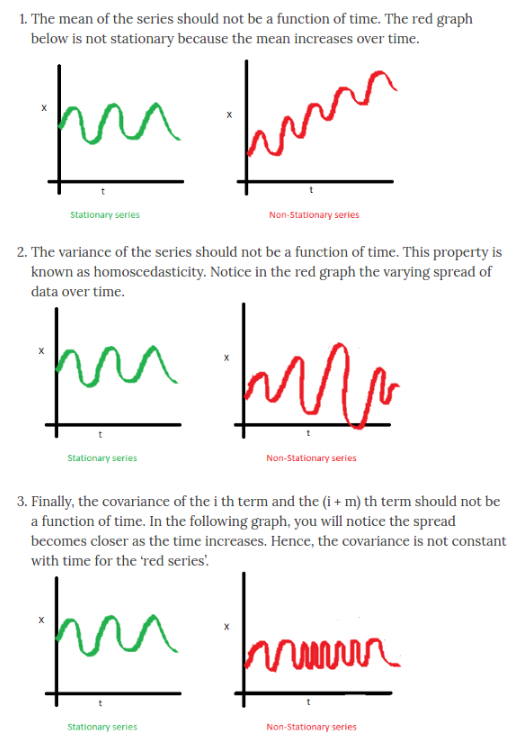

In [34]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TS-07.PNG', width=600)

`Why do we care about stationarity? `

- A stationary time series (TS) is simple to predict as we can assume that future statistical properties are the same or proportional to current statistical properties.

- Most of the models we use in TSA assume covariance-stationarity (#3 above). This means the descriptive statistics these models predict e.g. means, variances, and correlations, are only reliable if the TS is stationary and invalid otherwise.

> "For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables." 

- With that said, most TS we encounter in finance is NOT stationary. Therefore a large part of TSA involves identifying if the series we want to predict is stationary, and if it is not we must find ways to transform it such that it is stationary. 

##### reading data (air passenders data)

- The data contains a particular month and number of passengers travelling in that month.

In [74]:
location = r'D:\MYLEARN\datasets\AirPassengers.csv'

In [76]:
df_airpassengers = pd.read_csv(location)

print (df_airpassengers.head())
print ('\n Data Types:')
print (df_airpassengers.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


But this is still not read as a TS object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [37]:
import datetime

In [77]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv(location, 
                   parse_dates=['Month'], 
                   index_col='Month', 
                   date_parser=dateparse)

print (data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


<ipython-input-77-fb2d8fa5a1f4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [78]:
airline_passengers = data['#Passengers'] 
airline_passengers.head(5)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

#### check stationarity using the following methods:-

(1) `Visual plots`

(2) `Summary Statistics`: review the summary statistics for the data for seasons or random partitions and check for obvious or significant differences.

(3) `Statistical Tests`: use statistical tests to check if the expectations of stationarity are met or have been violated.

> __Dickey-Fuller Test__: This is one of the statistical tests for checking stationarity. 

> Here the null hypothesis is that the TS is non-stationary. 

> The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 

> If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

... let us read one more dataset ...

In [79]:
location1 = r'D:\MYLEARN\datasets\daily-total-female-births-in-cal.csv'

In [80]:
series_birth_cal = pd.read_csv(location1, header=0)
series_birth_cal.head()

,Date,birth_count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [81]:
series_birth_cal.describe()

,birth_count
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


#### Checking stationarity - using visual plots

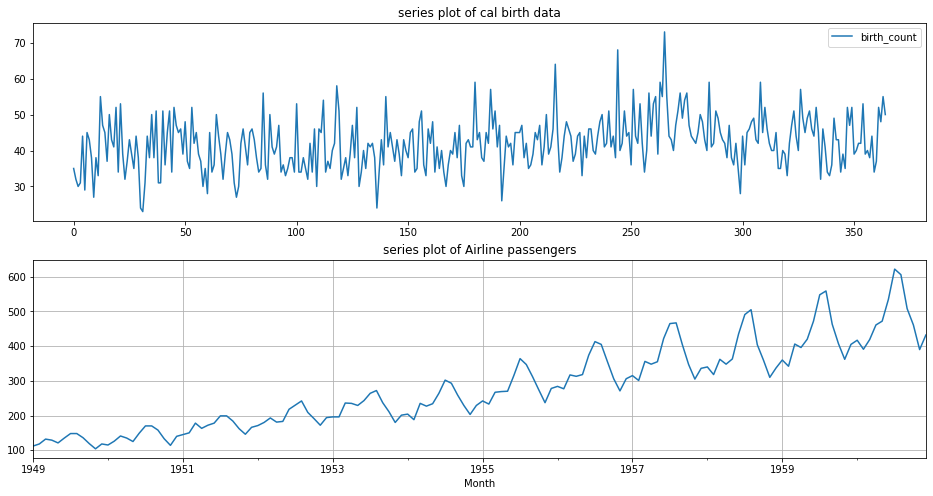

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(16, 8))

series_birth_cal.plot(ax=ax1, title ='series plot of cal birth data')
airline_passengers.plot(ax=ax2, title ='series plot of Airline passengers')
plt.grid();

#### Checking stationarity - Summary Statistics

- split the time series into 2 contiguous sequences. 
- calculate the mean and variance of each group of numbers and compare the values.

##### California birth data

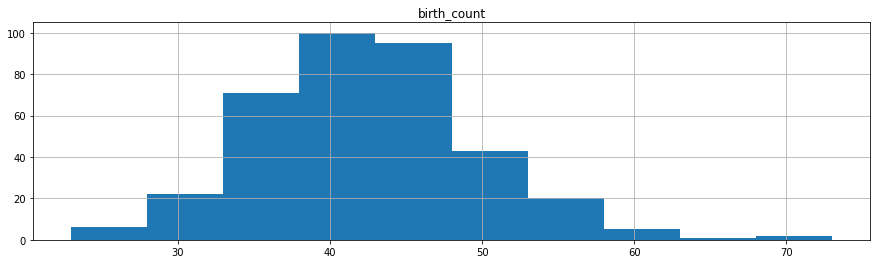

In [44]:
series_birth_cal.hist();

In [52]:
X = series_birth_cal.birth_count.values

split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     =      39.76, mean2     =      44.19
variance1 =      49.21, variance2 =      48.71


- the mean and variance values are different, but in the same ball-park.

#### We should verify if the mean of X1 ad X2 are same

- Using hypothesis testing (`t-test`)
- Null hypothesis is : $H_0$ : the $\mu_{X1}$ = $\mu_{X2}$

- Conclusion : if the p-value returned is less than 0.05 we can reject the $H_0$ ... it means the mean of X1 is not equal to mean X2

In [83]:
from scipy.stats import ttest_ind

In [85]:
ret_value = ttest_ind(X1, X2)

In [86]:
if ret_value[1] < 0.05:
    print('We are going to reject the H_0, meaning the means are NOT SAME')
else:
    print('We are going to accept the H_0, meaning the means are SAME')

We are going to reject the H_0, meaning the means are NOT SAME


#### Assumption of t-test

#### 2. Normal distribution of residuals

-Next to test the assumption of normality. The residuals needs to be normally distributed. To calculate the residuals between the groups, subtract the values of one group from the values of the other group.

In [56]:
diff = X1 - X2

ValueError: operands could not be broadcast together with shapes (182,) (183,) 

In [50]:
# check for normality visually with a p-p plot and a histogram plot.

plt.hist(diff)
plt.title("Sepal Width Residuals")
plt.xlabel("Length (cm)")
plt.savefig("Residuals Plot of Sepal Width.png")

NameError: name 'diff' is not defined

In [417]:
len(diff)

72

##### For the airline passengers data

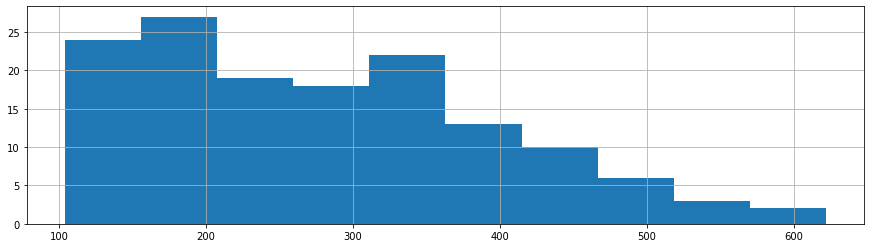

In [87]:
df_airpassengers['#Passengers'].hist();

In [88]:
X = df_airpassengers['#Passengers'].values

split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     =     182.90, mean2     =     377.69
variance1 =    2244.09, variance2 =    7367.96


the mean and variance look very different.

We have a __non-stationary time series.__

#### Stationarity test : Augmented Dickey-Fuller test - (ADF) test 

- The intuition behind the test is that it determines how strongly a time series is defined by a trend. (i.e no stationarity)

$ H_0 : $ - time series is __not stationary __

$ H_A : $ - time series is stationary 

p-value <= 0.05: Reject the null hypothesis ($H_0$), the data does not have a unit root and is stationary.

> p-value > 0.05: Fail to reject the null hypothesis ($H_0$), the data has a unit root and is non-stationary.

** Returns **

    adf -     Test statistic

    pvalue - MacKinnon’s approximate p-value based on MacKinnon (1994, 2010)

In [89]:
from statsmodels.tsa.stattools import adfuller

#### 3.1. on california baby birth dataset

In [90]:
X = series_birth_cal.birth_count.values

result = adfuller(X)
result

(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [91]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
	print('\t%5s: %8.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	   1%:   -3.449
	   5%:   -2.870
	  10%:   -2.571


#### conclusion

1. p-value method : p-value of 0.000052 is $\lt$ 0.05 so we reject the null hypothesis (that the series is NON-STATIONARY).
    
2. Critical value  : our statistic value of -4 is less than the value of -3.449 at 1%. So this falls in the critical region. Hence we can reject the null hypothesis. i.e TS is stationary

#### 3.2. on air passenger dataset

In [92]:
X = df_airpassengers['#Passengers'].values

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


#### conclusion

1. p-value method : p-value of 0.991880 is $\gt$ 0.05 so we CANNOT reject the null hypothesis. TS not stationary
    
2. Critical value  : our statistic value of 0.815369 is more than the value of -3.449 at 1%. So this falls in the acceptance region. Hence we CANNOT reject the null hypothesis. i.e TS is not stationary


----------------------------------
#### Time series decomposition
---------------------------------

In [293]:
import statsmodels.api as sm

In [294]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

In [295]:
co2.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [296]:
co2.shape

(2284, 1)

In [297]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

The dtype=datetime[ns] field confirms that our index is made of date stamp objects, while length=2284 and freq='W-SAT' tells us that we have 2,284 weekly date stamps starting on Saturdays.

Weekly data can be tricky to work with, so let’s use the monthly averages of our time-series instead. This can be obtained by using the convenient resample function, which allows us to group the time-series into buckets (1 month), apply a function on each group (mean), and combine the result (one row per group).

In [298]:
y = co2['co2'].resample('MS').mean()

Here, the term MS means that we group the data in buckets by months and ensures that we are using the start of each month as the timestamp:

In [299]:
y.head(5)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [300]:
y.shape

(526,)

An interesting feature of pandas is its ability to handle date stamp indices, which allow us to quickly slice our data. For example, we can slice our dataset to only retrieve data points that come after the year 1990:

In [301]:
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

Or, we can slice our dataset to only retrieve data points between October 1995 and October 1996:

In [302]:
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

#### Handling Missing Values in Time-series Data
Real world data tends be messy. As we can see from the plot, it is not uncommon for time-series data to contain missing values. The simplest way to check for those is either by directly plotting the data or by using the command below that will reveal missing data in ouput:

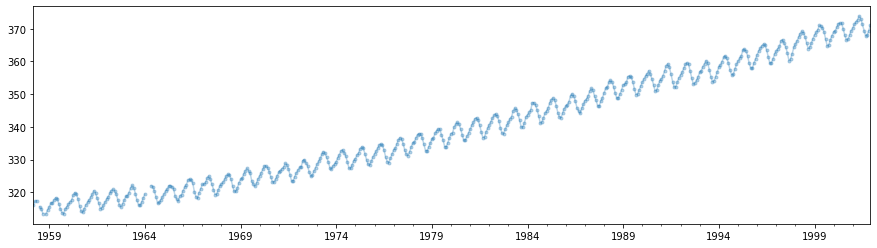

In [303]:
y.plot(marker='.', linestyle=None, alpha=.3);

In [304]:
y.isnull().sum()

5

This output tells us that there are 5 months with missing values in our time series.

Generally, we should “fill in” missing values if they are not too numerous so that we don’t have gaps in the data. We can do this in pandas using the fillna() command. For simplicity, we can fill in missing values with the `closest non-null` value in our time series, although it is important to note that a `rolling mean` would sometimes be preferable.

In [305]:
y = y.fillna(y.bfill())

#### Visualizing Time-series Data
When working with time-series data, a lot can be revealed through visualizing it. A few things to look out for are:

- seasonality: does the data display a clear periodic pattern?
- trend: does the data follow a consistent upwards or downward slope?
- noise: are there any outlier points or missing values that are not consistent with the rest of the data?

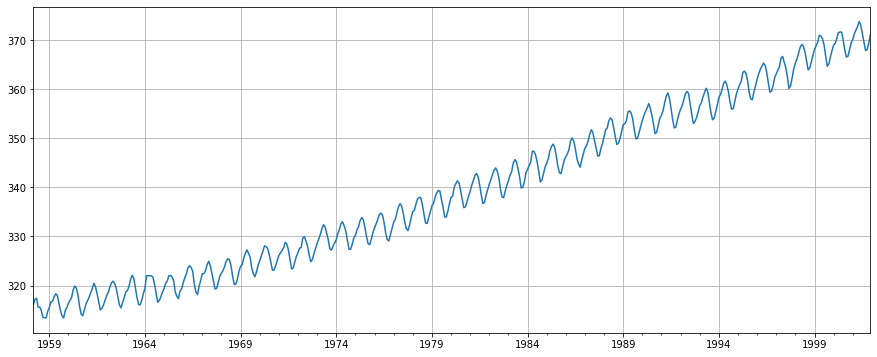

In [306]:
y.plot(figsize=(15, 6))
plt.grid()

The time-series has an obvious `seasonality` pattern, as well as an overall `increasing trend`. 

We can also visualize our data using a method called time-series `decomposition`. 

As its name suggests, time series decomposition allows us to decompose our time series into three distinct components: `trend`, `seasonality`, and `noise`.

In [432]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

In [427]:
series_birth_cal_index = series_birth_cal.set_index('Date')

In [430]:
series_birth_cal_index = series_birth_cal_index.asfreq('d')

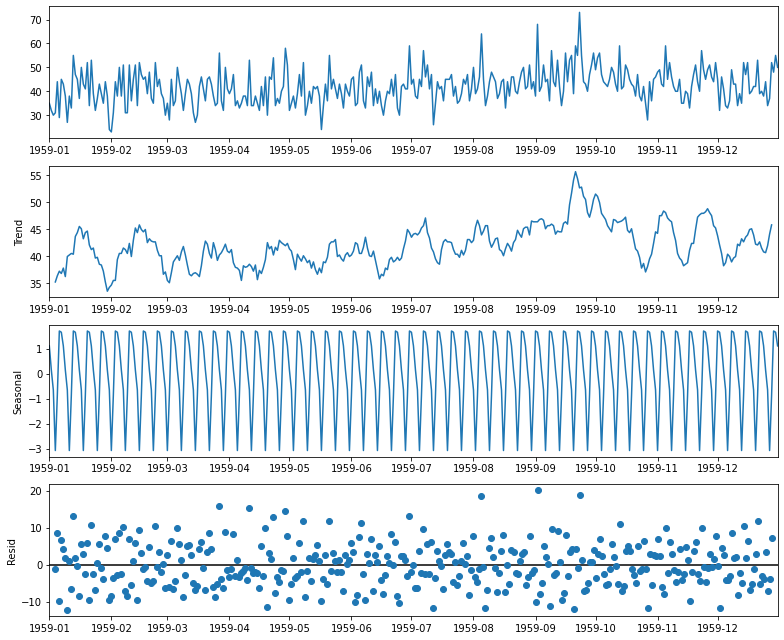

In [433]:
decomposition = sm.tsa.seasonal_decompose(series_birth_cal_index, model='additive')
fig = decomposition.plot()

Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data. The plot above clearly shows the upwards trend of our data, along with its yearly seasonality. These can be used to understand the structure of our time-series. The intuition behind time-series decomposition is important, as many forecasting methods build upon this concept of structured decomposition to produce forecasts.

#### decompose the trend and sesonality on the cal birth data and also the airline passengers data

In [435]:
df_airpassengers

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [436]:
df_airpassengers = df_airpassengers.set_index('Month')

In [437]:
df_airpassengers = df_airpassengers.asfreq('M')

In [443]:
df_airpassengers.dropna()

,#Passengers
Month,


In [442]:
decomposition = sm.tsa.seasonal_decompose(df_airpassengers, model='additive')
fig = decomposition.plot()

ValueError: This function does not handle missing values

#### How to make a Time Series Stationary?

- its almost `impossible` to make a series perfectly stationary

- There are 2 major reasons behind non-stationarity of a TS: 

1. Trend – varying mean over time. 
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

_The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series._

__reduce trend__ can be transformation. 

For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc

#### making series stationary - log transform

In [447]:
X = df_airpassengers['#Passengers'].values

X_log = log(X)

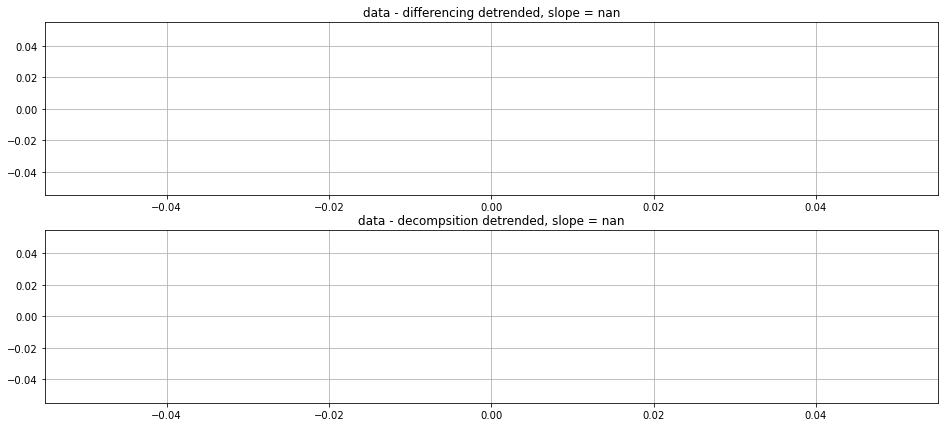

In [448]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 7))

ret_value = detect_trend(pd.DataFrame(X),          plot=True, series_type='differencing',  ax=ax1)
ret_value = detect_trend(pd.DataFrame(X_log), plot=True, series_type='decompsition',  ax=ax2)

#### making series stationary - moving averages

In this approach, we take average of `k` consecutive values depending on the frequency of time series. 

Here we can take the average over the past 1 year, i.e. last 12 values. 

Pandas has specific functions defined for determining `rolling statistics`.

In [318]:
moving_avg = df_airpassengers['#Passengers'].rolling(window=12).mean()

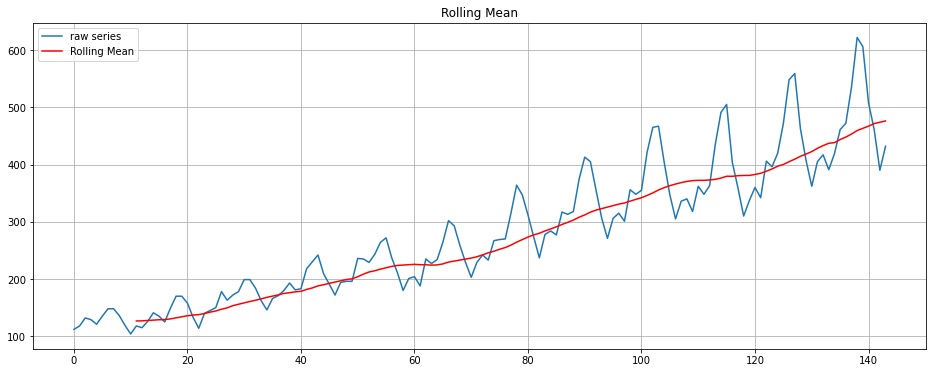

In [323]:
plt.figure(figsize=(16, 6))
plt.plot(df_airpassengers['#Passengers'], label='raw series')
plt.plot(moving_avg, color='red', label='Rolling Mean');

plt.legend(loc='best')
plt.title('Rolling Mean')
plt.grid();

#### Example on PANDAS rolling

In [449]:
location = r'D:\MYLEARN\DATASETS\UMTMVS.csv'

In [450]:
df_UMTMVS = pd.read_csv(location)

In [451]:
df_UMTMVS.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


Since we want our “DATE” column as our index, but simply by reading, it is not doing it, so we have to add some extra parameters.

In [452]:
df_UMTMVS = pd.read_csv(location, index_col='DATE')
df_UMTMVS.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [453]:
df_UMTMVS.isnull().sum()

UMTMVS    0
dtype: int64

In [454]:
df_UMTMVS.index 

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

Here we can see that Pandas is dealing with our Index column as a `simple object`, so let’s convert it into `DateTime`. 

In [455]:
df_UMTMVS.index = pd.to_datetime(df_UMTMVS.index)
df_UMTMVS.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

Now we can see that dtype of our dataset is datetime64[ns]. 

This “[ns]” shows that it is precise in nanoseconds. 

We can change it to “Days” or “Months” if we want.

Alternatively, to avoid all this fuss, we can load data in single line of code using Pandas as follows.

In [398]:
df_UMTMVS = pd.read_csv(location, index_col='DATE', parse_dates=True)
df_UMTMVS.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

Here we have added `parse_dates=True`, so it will automatically use our index as dates.

#### Time-Resampling using Pandas

Think of resampling as groupby() where we group by based on any column and then apply an aggregate function to check our results. Whereas in the Time-Series index, we can resample based on any rule in which we specify whether we want to resample based on “Years” or “Months” or “Days or anything else.

|Alias|Description|
|-----|-----------|
|B|business day frequency|
|C|custom business day frequency|
|D|calendar day frequency|
|W|weekly frequency|
|M|month end frequency|
|SM|semi-month end frequency (15th and end of month)|
|BM|business month end frequency|
|CBM|custom business month end frequency|
|MS|month start frequency|
|SMS|semi-month start frequency (1st and 15th)|
|BMS|business month start frequency|
|CBMS|custom business month start frequency|
|Q|quarter end frequency|
|BQ|business quarter end frequency|
|QS|quarter start frequency|
|BQS|business quarter start frequency|
|A, Y|year end frequency|
|BA, BY|business year end frequency|
|AS, YS|year start frequency|
|BAS, BY|Sbusiness year start frequency|
|BH|business hour frequency|
|H|hourly frequency|
|T|minminutely frequency|
|S|secondly frequency|
|L|msmilliseconds|
|U|usmicroseconds|
|N|nanoseconds|

In [457]:
df_UMTMVS.resample(rule='M').sum()[:10]

,UMTMVS
DATE,
1992-01-31,209438.0
1992-02-29,232679.0
1992-03-31,249673.0
1992-04-30,239666.0
1992-05-31,243231.0
1992-06-30,262854.0
1992-07-31,222832.0
1992-08-31,240299.0
1992-09-30,260216.0


#### Rolling Time Series
 
`Rolling` is also similar to `Time Resampling`, but in Rolling, we take a window of any size and perform any function on it. In simple words, we can say that a rolling window of size k means k consecutive values.

Let’s see an example. If we want to calculate the rolling average of 10 days, we can do it as follows.

In [458]:
df_UMTMVS.rolling(window=10).mean().head(12) # head to see first 20 values 

,UMTMVS
DATE,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,NaN
1992-08-01,NaN
1992-09-01,NaN


Now here, we can see that the first 10 values are NaN because there are not enough values to calculate the rolling mean for the first 10 values. It starts calculating the mean from the 11th value and goes on.

In [459]:
df_UMTMVS['UMTMVS'].resample(rule='W').mean()

DATE
1992-01-05    209438.0
1992-01-12         NaN
1992-01-19         NaN
1992-01-26         NaN
1992-02-02    232679.0
                ...   
2018-12-09         NaN
2018-12-16         NaN
2018-12-23         NaN
2018-12-30         NaN
2019-01-06    466791.0
Freq: W-SUN, Name: UMTMVS, Length: 1410, dtype: float64

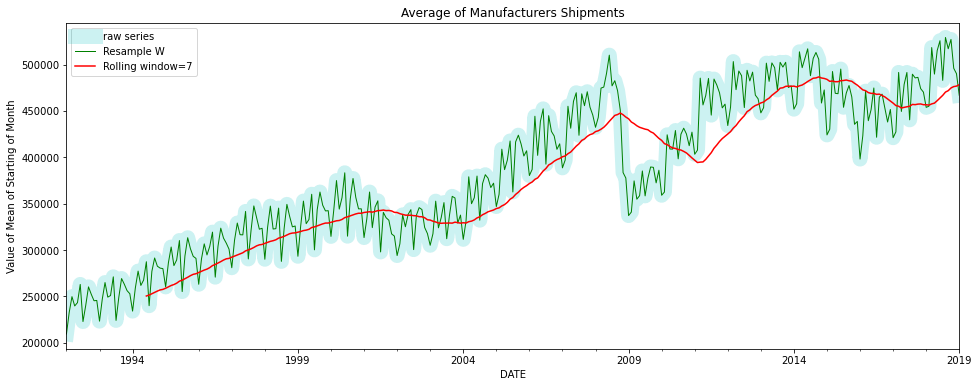

In [460]:
fig, ax = plt.subplots(1,1, figsize=(16, 6))

ax = df_UMTMVS['UMTMVS'].plot(label='raw series', color='c', alpha=.2, linewidth=15)
ax = df_UMTMVS['UMTMVS'].resample(rule='M').mean().plot(label='Resample W', color='g', linewidth=1)
ax = df_UMTMVS['UMTMVS'].rolling(window=30).mean().plot(label='Rolling window=7', color='r')

ax.set_ylabel('Value of Mean of Starting of Month')
ax.set_title('Average of Manufacturers Shipments')
plt.legend();

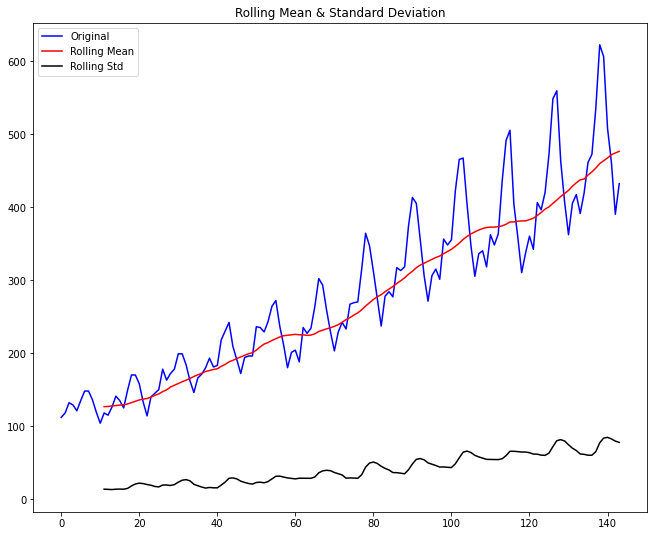

In [380]:
X = df_airpassengers['#Passengers']

# Determing rolling statistics
rollin_mean = X.rolling(window=12).mean()
rollin_std  = X.rolling(window=12).std()

# Plot rolling statistics:
orig = plt.plot(X, color='blue',label='Original')
mean = plt.plot(rollin_mean, color='red', label='Rolling Mean')
std  = plt.plot(rollin_std, color='black', label = 'Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [383]:
type(rollin_mean)

pandas.core.series.Series

In [384]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')

dftest = adfuller(rollin_mean.dropna())

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.873695
p-value                          0.992737
#Lags Used                       2.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### conclusion

1. p-value method : p-value of 0.991880 is $\gt$ 0.05 so we CANNOT reject the null hypothesis. TS not stationary
    
2. Critical value  : our statistic value of 0.815369 is more than the value of -3.449 at 1%. So this falls in the acceptance region. Hence we CANNOT reject the null hypothesis. i.e TS is not stationary

#### making series stationary - exponentially weighted moving average

In [403]:
X = df_airpassengers['#Passengers']

In [404]:
ewma = pd.Series.ewm

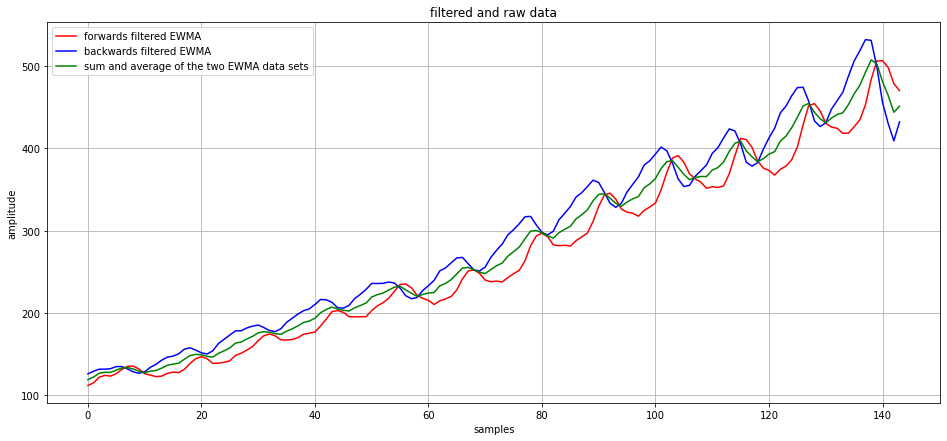

In [405]:
# take EWMA in both directions then average them
fwd = ewma(X, span=10).mean()           # take EWMA in fwd direction
bwd = ewma(X[::-1], span=10).mean()     # take EWMA in bwd direction

filtered = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
filtered = np.mean(filtered, axis=0 )    # average

plt.figure(figsize=(16, 7))
plt.title('filtered and raw data')

#plt.plot(y,        color = 'orange', label = 'noisy data')
plt.plot(fwd,      color = 'red',    label = 'forwards filtered EWMA ')
plt.plot(bwd,      color = 'blue',   label = 'backwards filtered EWMA')
plt.plot(filtered, color = 'green',  label = 'sum and average of the two EWMA data sets')

plt.xlabel('samples')
plt.ylabel('amplitude')
plt.grid()
plt.legend(loc='upper left');

-------------------------------
#### White NOISE 
--------------------------------

- how to detect

In [200]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

# seed random number generator
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

In [201]:
# summary stats
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

We can see that the mean is nearly 0.0 and the standard deviation is nearly 1.0. Some variance is expected given the small size of the sample.

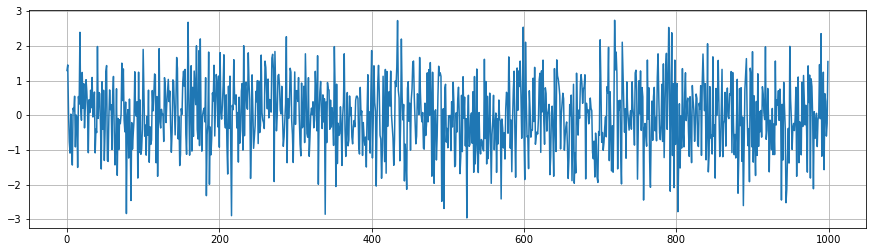

In [187]:
# line plot
series.plot()
plt.grid();

We can see that it does appear that the series is random.

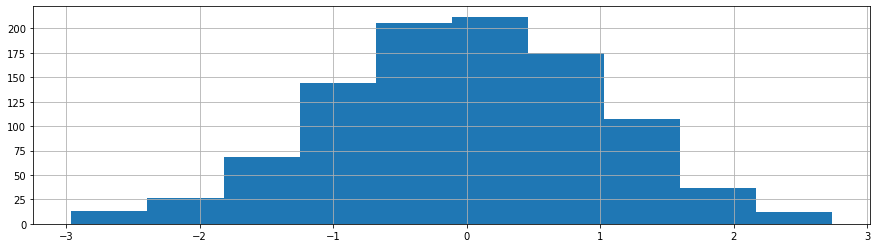

In [188]:
series.hist();

the histogram shows the bell-curve shape.

# (4) Random Walk

#### Example 1

In [78]:
# Probability to move up or down 
prob = [0.05, 0.95]   

In [79]:
# statically defining the starting position 
start = 2  
positions = [start] 

In [80]:
# creating the random points 
rr = np.random.random(1000) 


In [81]:
downp = rr < prob[0] 
upp   = rr > prob[1] 


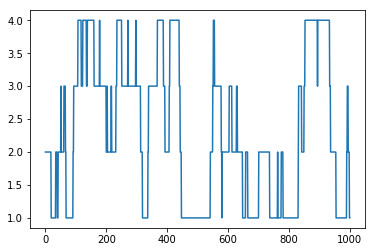

In [82]:
for idownp, iupp in zip(downp, upp): 
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up) 
  
# plotting down the graph of the random walk in 1D 
plt.plot(positions) ;



#### Example 2

In [24]:
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

#### Random walk in 1-D :

We start at origin(y=0) and choose a step to move for each successive step with equal probability. Starting point is shown in red and end point is shown in black. A cumulative sum is plotted in the plot below which shows path followed by a body in 1D over 10k steps.

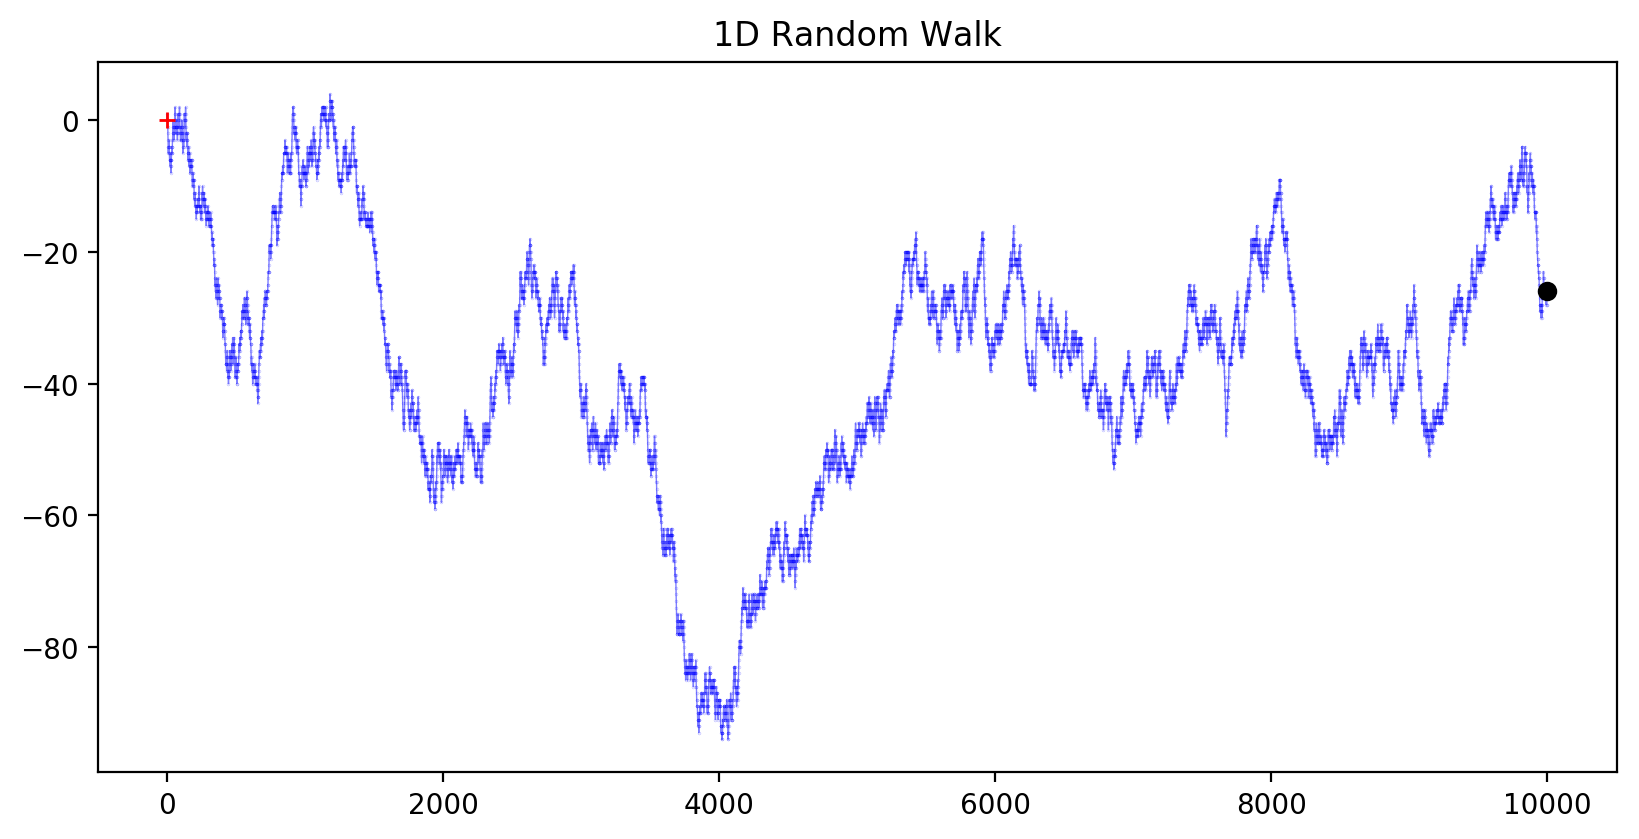

In [83]:
# Define parameters for the walk
dims     = 1
step_n   = 10000
step_set = [-1, 0, 1]

origin = np.zeros((1, dims))

# Simulate steps in 1D
step_shape = (step_n, dims)
steps      = np.random.choice(a=step_set, size=step_shape)
path       = np.concatenate([origin, steps]).cumsum(0)

start = path[:1]
stop  = path[-1:]

# Plot the path
fig = plt.figure(figsize=(8,4),dpi=200)
ax  = fig.add_subplot(111)

ax.scatter(np.arange(step_n+1), path, c='blue', alpha=0.25, s=0.05);
ax.plot(path,c='blue', alpha=0.5, lw=0.5);
ax.plot(0, start, c='red', marker='+')
ax.plot(step_n, stop, c='black', marker='o')

plt.title('1D Random Walk')
plt.tight_layout(pad=0)
#plt.savefig(‘plots/random_walk_1d.png’,dpi=250);

#### Random walk in 2-D :

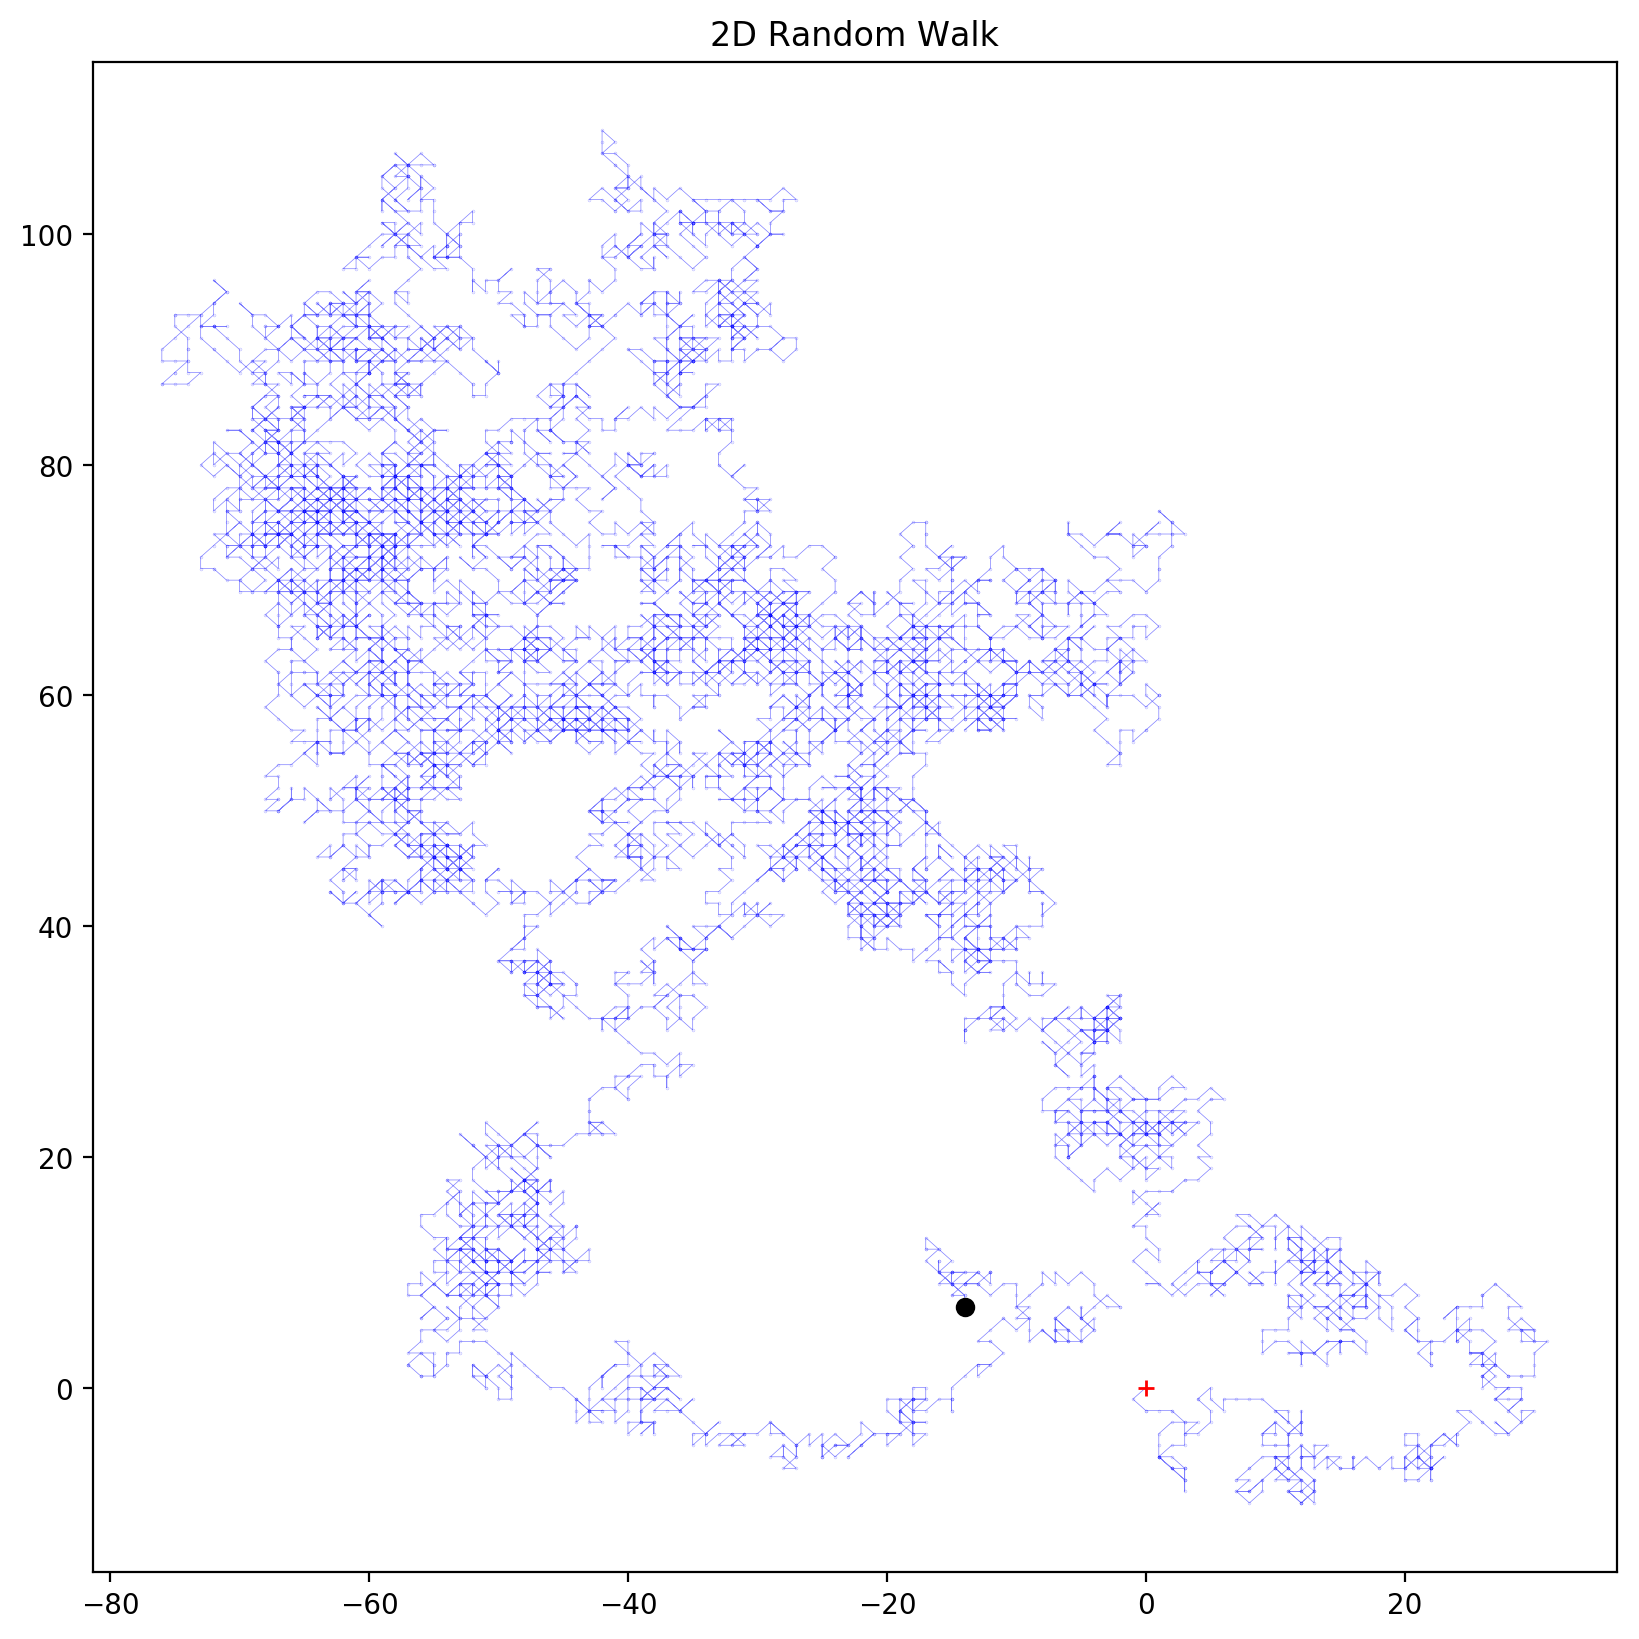

In [84]:
# Define parameters for the walk
dims = 2
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 2D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)

ax.scatter(path[:,0], path[:,1],c='blue', alpha=0.25, s=0.05);
ax.plot(path[:,0], path[:,1], c='blue', alpha=0.5, lw=0.25);
ax.plot(start[:,0], start[:,1], c='red', marker='+')
ax.plot(stop[:,0], stop[:,1], c='black', marker='o')

plt.title('2D Random Walk')
plt.tight_layout(pad=0)

#### Example - 3

A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence.

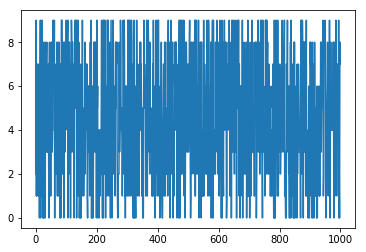

In [85]:
from random import randrange
seed(1)
series = [randrange(10) for i in range(1000)]
plt.plot(series)

** This is not a random walk. It is just a sequence of random numbers. **

A simple model of a random walk is as follows:

    Start with a random number of either -1 or 1.
    
    Randomly select a -1 or 1 and add it to the observation from the previous time step.
    
    Repeat step 2 for as long as you like.
    
y(t) = B0 + B1*X(t-1) + e(t)

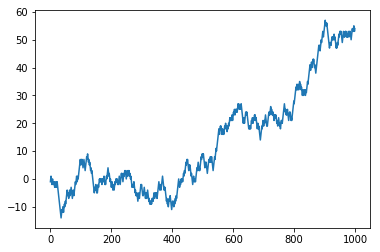

In [86]:
from random import seed
from random import random
seed(1)

random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)

for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
plt.plot(random_walk)

We can see that it looks very different from our above sequence of random numbers. In fact, the shape and movement looks like a realistic time series for the price of a security on the stock market.